In [60]:
#loading data onto ipynb file
from zipfile import ZipFile
file_name = "archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [61]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from pathlib import Path
from collections import Counter

train_data_path = '/content/Dataset/train'
for root, dir, files in os.walk(train_data_path):
  for dir_name in dir:
    print(f'Subfolder: {dir_name}')

Subfolder: Systemic Disease
Subfolder: Light Diseases and Disorders of Pigmentation
Subfolder: Exanthems and Drug Eruptions
Subfolder: Warts Molluscum and other Viral Infections
Subfolder: Poison Ivy Photos and other Contact Dermatitis
Subfolder: Eczema Photos
Subfolder: Cellulitis Impetigo and other Bacterial Infections
Subfolder: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Subfolder: Herpes HPV and other STDs Photos
Subfolder: Melanoma Skin Cancer Nevi and Moles
Subfolder: Tinea Ringworm Candidiasis and other Fungal Infections
Subfolder: Vasculitis Photos
Subfolder: Acne and Rosacea Photos
Subfolder: Psoriasis pictures Lichen Planus and related diseases
Subfolder: Seborrheic Keratoses and other Benign Tumors
Subfolder: Lupus and other Connective Tissue diseases
Subfolder: Urticaria Hives
Subfolder: Atopic Dermatitis Photos
Subfolder: Vascular Tumors


In [62]:
for root, dir, files in os.walk(train_data_path):
  for filename in files:
    if filename.lower().endswith(('jpg', 'jpeg')):
      print(f'Image name : {os.path.join(root, filename)}')

Image name : /content/Dataset/train/Systemic Disease/cowden-disease-5.jpg
Image name : /content/Dataset/train/Systemic Disease/xanthomas-35.jpg
Image name : /content/Dataset/train/Systemic Disease/xanthomas-13.jpg
Image name : /content/Dataset/train/Systemic Disease/acanthosis-nigricans-39.jpg
Image name : /content/Dataset/train/Systemic Disease/lipoid-proteinosis-8.jpg
Image name : /content/Dataset/train/Systemic Disease/tuberous-sclerosis-33.jpg
Image name : /content/Dataset/train/Systemic Disease/pretibial-myxedema-4.jpg
Image name : /content/Dataset/train/Systemic Disease/hypothyroidism-3.jpg
Image name : /content/Dataset/train/Systemic Disease/xanthomas-6.jpg
Image name : /content/Dataset/train/Systemic Disease/lipoid-proteinosis-7.jpg
Image name : /content/Dataset/train/Systemic Disease/trichoepithelioma-1.jpg
Image name : /content/Dataset/train/Systemic Disease/26BirtHoggDube0911062.jpg
Image name : /content/Dataset/train/Systemic Disease/xanthomas-38.jpg
Image name : /content/D

Training class distribution
Acne and Rosacea Photos: 840 images
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 322 images
Atopic Dermatitis Photos: 100 images
Cellulitis Impetigo and other Bacterial Infections: 65 images
Eczema Photos: 35 images
Exanthems and Drug Eruptions: 20 images
Herpes HPV and other STDs Photos: 40 images
Light Diseases and Disorders of Pigmentation: 299 images
Lupus and other Connective Tissue diseases: 90 images
Melanoma Skin Cancer Nevi and Moles: 24 images
Poison Ivy Photos and other Contact Dermatitis: 62 images
Psoriasis pictures Lichen Planus and related diseases: 62 images
Seborrheic Keratoses and other Benign Tumors: 80 images
Systemic Disease: 81 images
Tinea Ringworm Candidiasis and other Fungal Infections: 122 images
Urticaria Hives: 3 images
Vascular Tumors: 101 images
Vasculitis Photos: 15 images
Warts Molluscum and other Viral Infections: 248 images


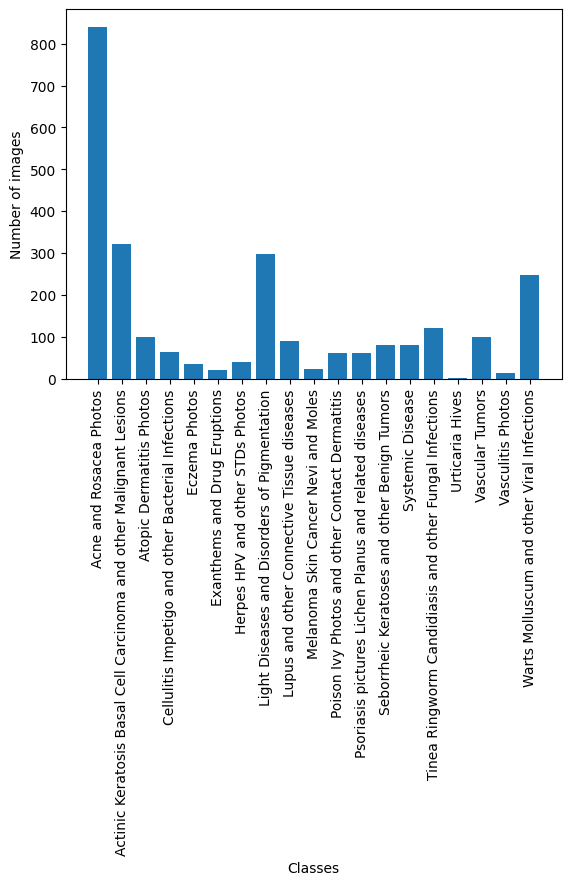

Text(0, 0.5, 'Number of images')

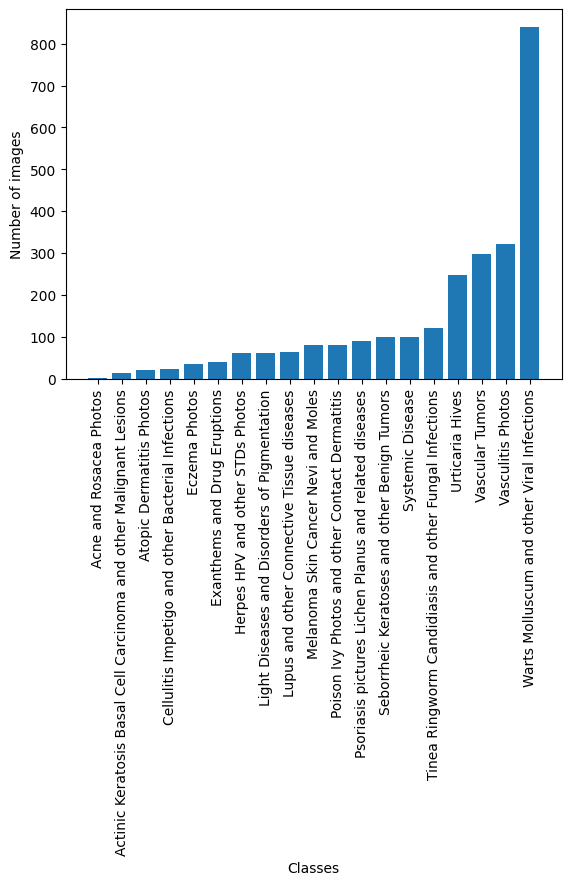

In [63]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
train_class_counts = Counter(train_dataset.targets)
sorted_train_class_counts = sorted(train_class_counts.items(), key=lambda x: x[1])
class_names = [train_dataset.classes[class_id] for class_id, _ in sorted_train_class_counts]
class_sizes = [count for _, count in sorted_train_class_counts]
print("Training class distribution")
for class_id, count in train_class_counts.items():
  print(f"{train_dataset.classes[class_id]}: {count} images")

plt.figure()
plt.bar(train_class_counts.keys(), train_class_counts.values(), tick_label = [train_dataset.classes[i] for i in train_class_counts.keys()])
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.xticks(rotation=90)
plt.show()
plt.bar(class_names, class_sizes, tick_label = [train_dataset.classes[i] for i in train_class_counts.keys()])
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of images")

In [64]:
min_count = min(train_class_counts.values())
max_count = max(train_class_counts.values())
balance_ratio = min_count / max_count
print(f'Class balance ratio is: {balance_ratio}')

Class balance ratio is: 0.0035714285714285713


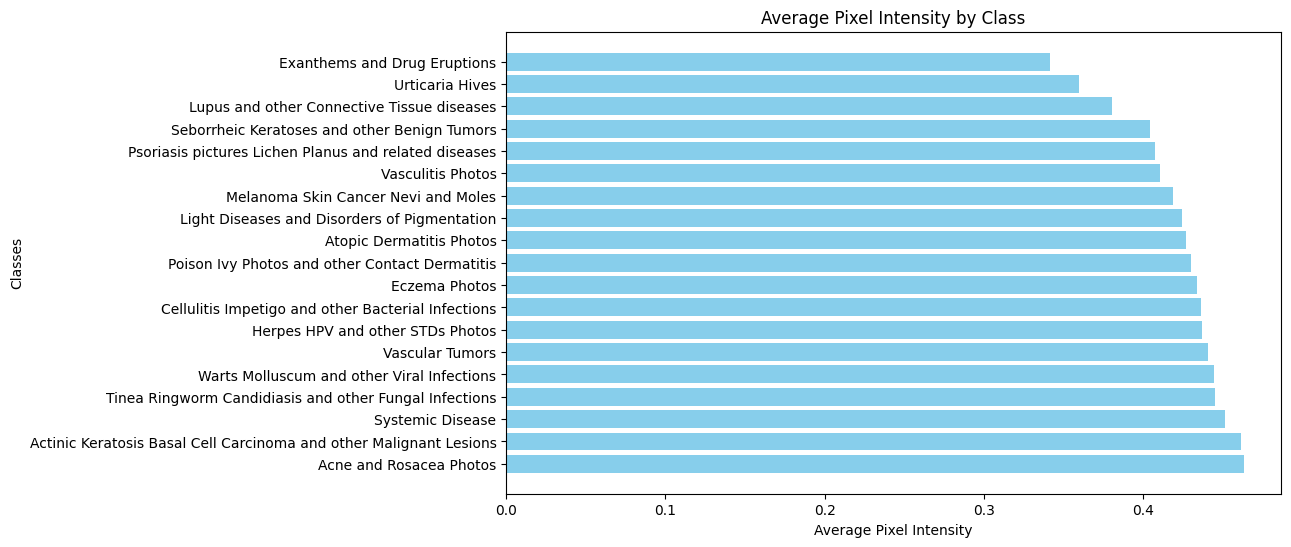

In [65]:
def compute_avg_pixel_intensity(images):
    """
    Compute the average pixel intensity for a batch of images.
    Returns the average intensity for each image in the batch.
    """
    # Calculate the average intensity per image (mean of all pixels across all channels)
    # For each image, we take the mean of the pixels for all three channels (RGB)
    return images.mean(dim=[1, 2, 3])  # Mean across height, width, and channels

# Dictionary to store the sum of average intensities for each class
class_intensities = {class_name: [] for class_name in train_dataset.classes}

# Loop through the dataset and compute the average pixel intensity for each class
for images, labels in train_loader:
    # Compute average pixel intensity for this batch of images
    avg_intensities = compute_avg_pixel_intensity(images)

    # Append the average intensities to the corresponding class
    for i, label in enumerate(labels):
        class_name = train_dataset.classes[label]
        class_intensities[class_name].append(avg_intensities[i].item())

# Now compute the average intensity for each class (mean across images)
class_avg_intensities = {class_name: np.mean(intensities) for class_name, intensities in class_intensities.items()}

# Sort the classes by average pixel intensity
sorted_class_avg_intensities = sorted(class_avg_intensities.items(), key=lambda x: x[1], reverse=True)

# Separate the class names and their corresponding average intensities for plotting
class_names = [item[0] for item in sorted_class_avg_intensities]
avg_intensities = [item[1] for item in sorted_class_avg_intensities]

# Plot the average pixel intensities for each class
plt.figure(figsize=(10, 6))
plt.barh(class_names, avg_intensities, color='skyblue')
plt.xlabel('Average Pixel Intensity')
plt.ylabel('Classes')
plt.title('Average Pixel Intensity by Class')
plt.show()

In [66]:
def calculate_mean_std(dataset, loader):
  mean = 0.0
  std = 0.0
  total_images = 0

  for images, _ in loader:
      batch_samples = images.size(0)  # Batch size
      images = images.view(batch_samples, images.size(1), -1)  # Flatten to (batch, channels, width*height)
      mean += images.mean(2).sum(0)
      std += images.std(2).sum(0)
      total_images += batch_samples

  mean /= total_images
  std /= total_images
  return mean, std

# Calculate mean and standard deviation for the training dataset
train_mean, train_std = calculate_mean_std(train_dataset, train_loader)
print(f"Training dataset - Mean: {train_mean}, Std: {train_std}")

Training dataset - Mean: tensor([0.5476, 0.4051, 0.3776]), Std: tensor([0.1778, 0.1475, 0.1424])


Training class distribution
Acne and Rosacea Photos: 231 images
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 120 images
Atopic Dermatitis Photos: 228 images
Bullous Disease Photos: 2 images
Cellulitis Impetigo and other Bacterial Infections: 14 images
Eczema Photos: 2 images
Exanthems and Drug Eruptions: 6 images
Herpes HPV and other STDs Photos: 6 images
Light Diseases and Disorders of Pigmentation: 30 images
Lupus and other Connective Tissue diseases: 25 images
Melanoma Skin Cancer Nevi and Moles: 5 images
Poison Ivy Photos and other Contact Dermatitis: 13 images
Psoriasis pictures Lichen Planus and related diseases: 24 images
Seborrheic Keratoses and other Benign Tumors: 31 images
Systemic Disease: 27 images
Tinea Ringworm Candidiasis and other Fungal Infections: 42 images
Urticaria Hives: 2 images
Vascular Tumors: 37 images
Vasculitis Photos: 1 images
Warts Molluscum and other Viral Infections: 51 images


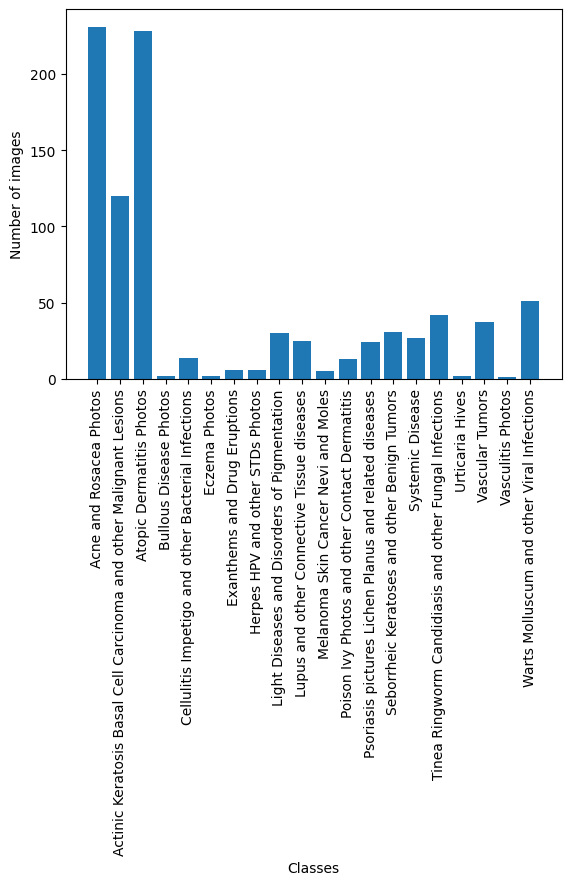

Text(0, 0.5, 'Number of images')

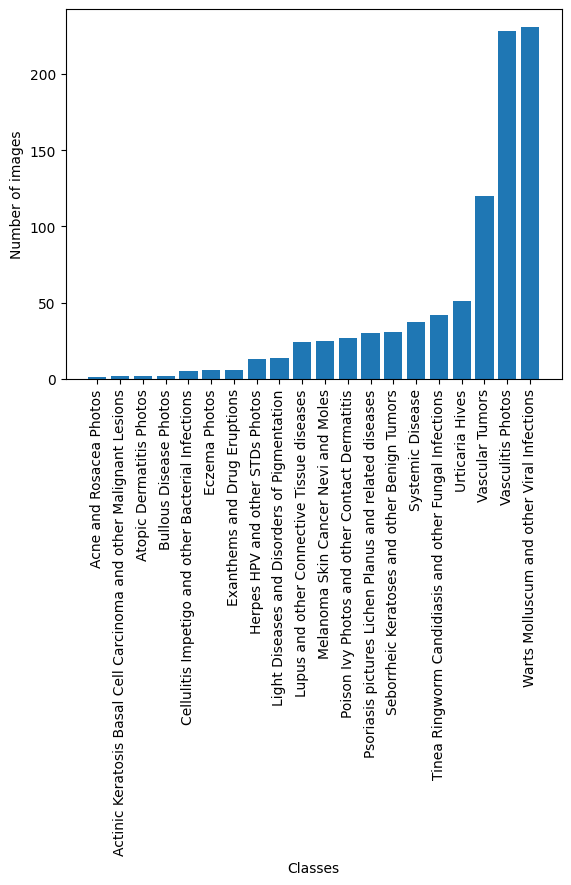

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

test_data_path = '/content/Dataset/test'
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
test_class_counts = Counter(test_dataset.targets)
sorted_test_class_counts = sorted(test_class_counts.items(), key=lambda x: x[1])
class_names = [test_dataset.classes[class_id] for class_id, _ in sorted_test_class_counts]
class_sizes = [count for _, count in sorted_test_class_counts]
print("Training class distribution")
for class_id, count in test_class_counts.items():
  print(f"{test_dataset.classes[class_id]}: {count} images")

plt.figure()
plt.bar(test_class_counts.keys(), test_class_counts.values(), tick_label = [test_dataset.classes[i] for i in test_class_counts.keys()])
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.xticks(rotation=90)
plt.show()
plt.bar(class_names, class_sizes, tick_label = [test_dataset.classes[i] for i in test_class_counts.keys()])
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of images")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The model has an accuracy score of 25.00%


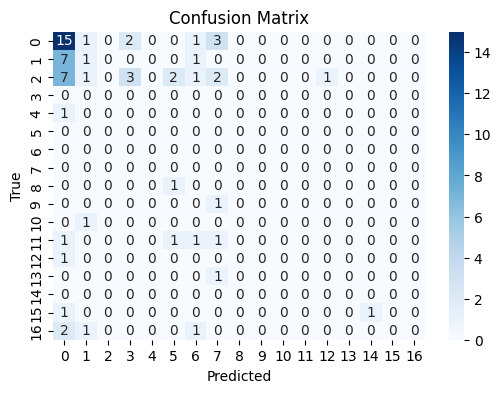

In [74]:
def flatten_images(loader):
  images, labels = next(iter(loader))
  images = images.view(images.size(0), -1).numpy()
  return images, labels.numpy()

X_train, y_train = flatten_images(train_loader)
X_test, y_test = flatten_images(test_loader)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
clf = LogisticRegression(max_iter = 100, solver = 'lbfgs', multi_class = 'multinomial')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The model has an accuracy score of {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()